<a href="https://colab.research.google.com/github/zenilist/DataAnalytics/blob/main/A_Kar_Quiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction and Data Summary**


1. *This project requires us to load the wine dataset provided via [Github](https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv) that has information of more than 12700 wines. We would then run exploratory data analysis on each attribute and draw meaningful insights from it.*
2. *Based on our EDA we would do data preparation to clean missing data and check for data integrity using our [wine research](https://cognitiveresearchjournal.springeropen.com/articles/10.1186/s41235-020-00225-6).*
3. *After that we would compare the result of the data preparation with the original data.*
4. *In the final step, we would make a short conclusion on how the data preparation helped make our data more suitable for machine learning prediction.* 


---



##**Attribute Description**:


*   INDEX: The Unique ID of the wine.
*   TARGET: Indicates number of cases of wine sold.

*   Fixed Acidity: The predominant fixed acids found in wines are tartaric, malic, citric, and succinic. Their respective levels found in wine can vary greatly but in general, one would expect to see 1,000 to 4,000 mg/L tartaric acid, 0 to 8,000 mg/L malic acid, 0 to 500 mg/L citric acid, and 500 to 2,000 mg/L succinic acid. [source](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity#:~:text=The%20predominant%20fixed%20acids%20found,2%2C000%20mg%2FL%20succinic%20acid.)
*   Volatile Acidity: The maximum volatile acidity, The legal limit of VA in finished wines is: 1.2 gram/liter in whites, 1.4 g/l in reds, 1.2 g/l in dessert wines and for late-harvest wines picked at 28 °Brix or above it's 1.5 g/l for whites and 1.7 g/l in reds. [source](https://enology.umn.edu/news/volatile-acidity-wine-making)


*   Citric Acid: Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. The disadvantage of adding citric acid is its microbial instability. [source](https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid#:~:text=Citric%20acid%20is%20often%20added,acid%20is%20its%20microbial%20instability.)
*   Residual Sugar: The sugar content in wines. Wines are classified into 5 types based on sweetness([for reference](https://winefolly.com/deep-dive/sugar-in-wine-chart/)):
    1. Bone-Dry <1 sugar calories per glass
    2. Dry 0-6 sugar calories per glass
    3. Off-Dry 6–21 sugar calories per glass
    4. Sweet 21–72 sugar calories per glass
    5. Very Sweet 72–130 sugar calories per glass


*    Chlorides: It is the amount of salt in the wine. Chlorides and quality appear a negative relationship for red and white wines. which can be interpreted as not much salt is required for a good quality. [source](https://rstudio-pubs-static.s3.amazonaws.com/251351_25362d71c5164cc0aaa946bf19b9bb49.html#:~:text=Chlorides,-fun(red%24chlorides&text=Chlorides%20is%20the%20amount%20of,required%20for%20a%20good%20quality.) 
*   Free Sulphur Dioxide: It determines how much Sulphur Dioxide is available in the active, molecular form to help protect the wine from oxidation and spoilage. [source](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/)


*   Total Sulphur Dioxide: The portion of Sulphur Dioxide that is free in the wine plus the portion that is bound to other chemicals in the wine such aldehydes, pigments, or sugars. The maximum allowable concentration for a bottled wine is 350 ppm. [source](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/)
*   Density: The typical density is generally between 1.080 and 1.090 g/ml. [source](http://www.creativeconnoisseur.com/newsletter/files/497deafe6be1b2efc87df8ac6071e459-162.html#:~:text=Quite%20obviously%20the%20density%20of,9%25%20more%20dense%20than%20water.)



*   pH: Wines lie on the acidic side of the pH spectrum, and most range from 2.5 to about 4.5 pH. [souce](https://winefolly.com/deep-dive/understanding-acidity-in-wine) 
*   Sulphates: Wine ranges from about 5 mg/L (5 parts per million) to about 200 mg/L. The maximum legal limit in the United States is 350 mg/l. A well made dry red wine typically has about 50 mg/l sulfites. Wines with lower acidity need more sulfites than higher acidity wines. At pH 3.6 and above, wines are much less stable, and sulfites are necessary for shelf-life. [source](https://winefolly.com/deep-dive/sulfites-in-wine/) The difference between sulphates and sulphites is their molecular makeup but they are both sulphur.


*   Alcohol: Alcohol by volume, or ABV, is the amount of ethanol in a given volume of liquid, expressed as a percentage. ABV is the global standard of measurement for alcohol content.

    1. The range of ABV for unfortified wine is about 5.5% to 16%, with an average of 11.6%.
    2. Fortified wines range from 15.5% to 25% ABV, with an average of 18%.
[source](https://www.masterclass.com/articles/learn-about-alcohol-content-in-wine-highest-to-lowest-abv-wines#what-does-alcohol-by-volume-abv-mean)
*  Label Appeal : Subjective marketing score that indicates the appeal of
the design of the label on the bottle
* Acid Index: Measures total acidity of wine via a weighted average Alcohol Content.
*  STARS: Wine rating as determined by experts on a 4 (excellent) - 1 (poor) scale.















##**Data Loading**

In [224]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#bring data from github
df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv")

print("Dimensions of the data: ", df.shape)

#show the first few rows of the data
df.head()

Dimensions of the data:  (12795, 16)


,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [225]:
#check if we have empty data
df.isna().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

In [226]:
#check for unique values for each attribute
df.nunique()

INDEX                 12795
TARGET                    9
FixedAcidity            470
VolatileAcidity         815
CitricAcid              602
ResidualSugar          2077
Chlorides              1663
FreeSulfurDioxide       999
TotalSulfurDioxide     1370
Density                5933
pH                      497
Sulphates               630
Alcohol                 401
LabelAppeal               5
AcidIndex                14
STARS                     4
dtype: int64

In [227]:
#the index column does not say anything interesting about the dataset except keep track of the row of each wine. so we drop the whole column.
df = df.drop(['INDEX'],axis=1)

columns = ['TARGET'	,'FixedAcidity',	'VolatileAcidity',	'CitricAcid',	'ResidualSugar'	,'Chlorides',	'FreeSulfurDioxide'	,'TotalSulfurDioxide',	'Density',	'pH',	'Sulphates',	'Alcohol',	'LabelAppeal',	'AcidIndex',	'STARS']

#check is we removed the column successfully
df.head()


,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [228]:
#rename target and stars variables for better readadility
#source: https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/21953142#overview
df = df.rename(columns={'TARGET': 'CasesSold', 'STARS':'Rating'})

In [229]:
#check data type of each attribute
df.dtypes

CasesSold               int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
Rating                float64
dtype: object

#**Exploratory Data Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b9e576450>,
      dtype=object)

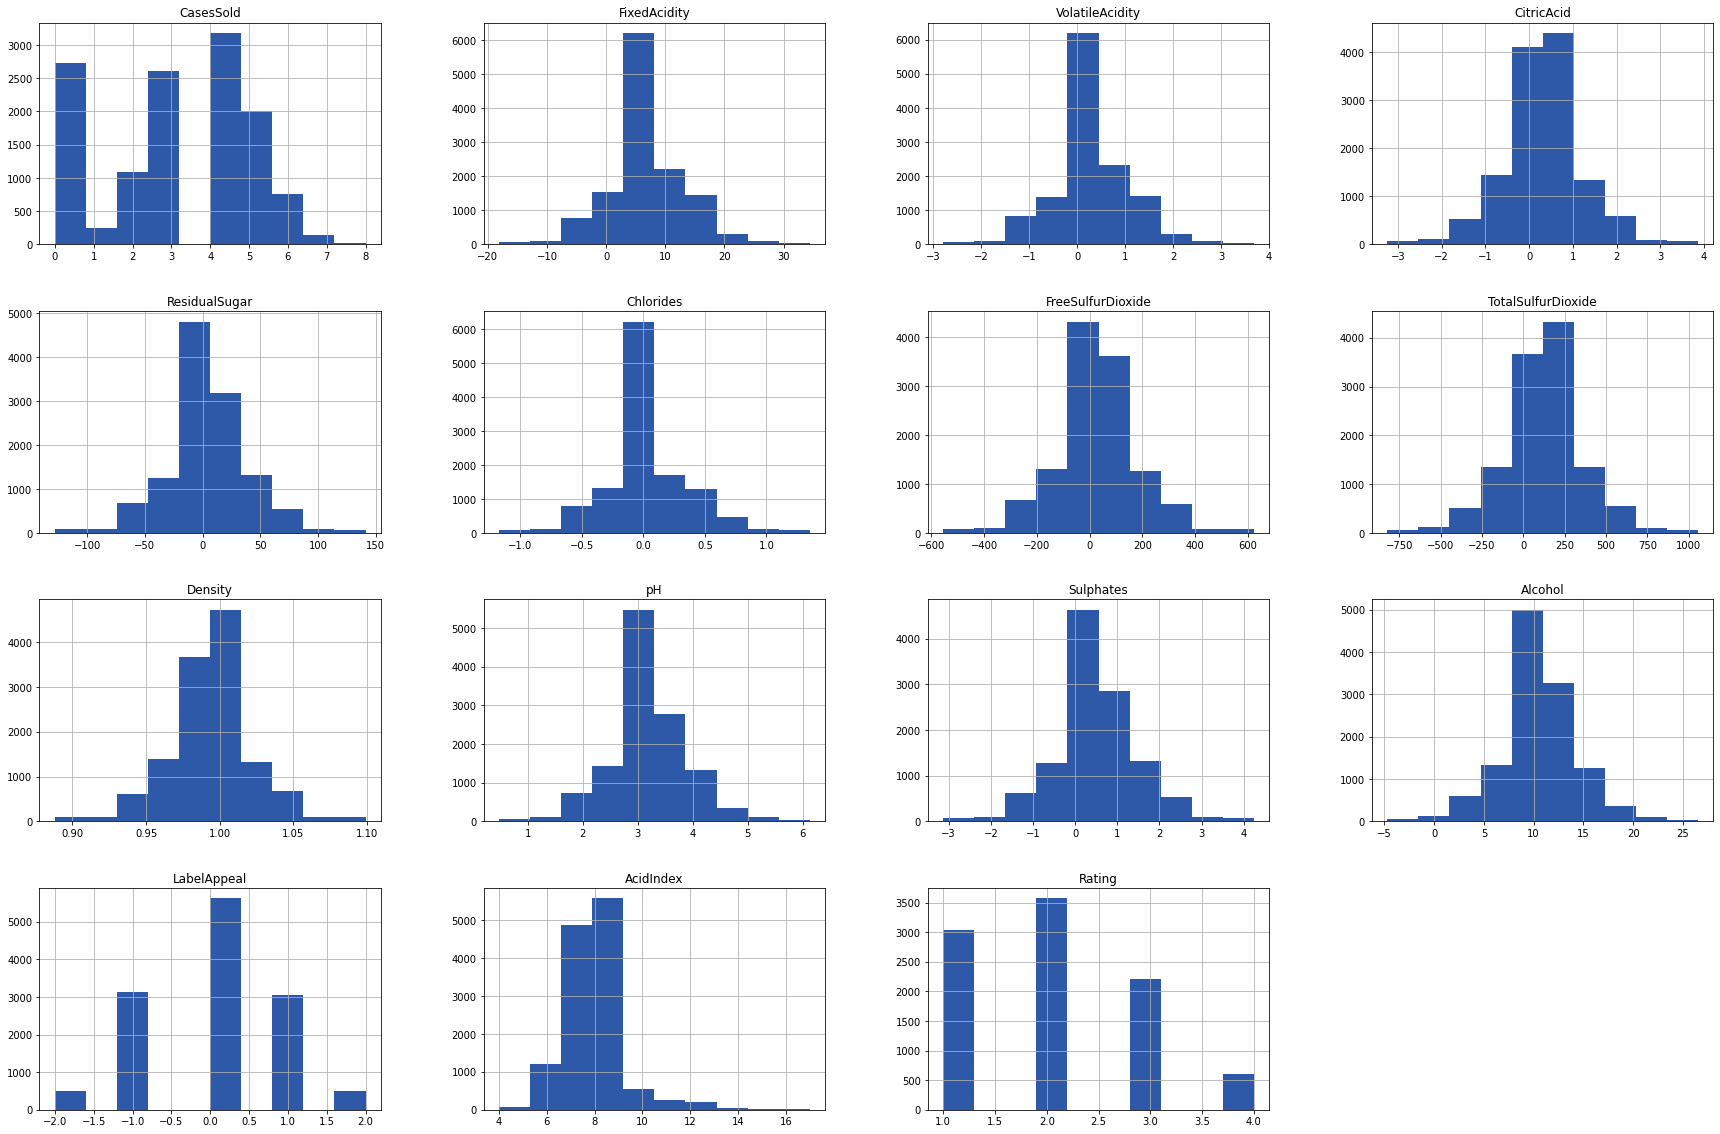

In [230]:
#histograms
df.hist(figsize=(30,20), color='#2e59a8')

Findings:
* More than 200 wine samples have volatile Acidity greater than the maximum limit. This could suggest that the wine is contaminated with acetic or lactic acid. [source](https://www.rjscraftwinemaking.com/craft-and-cork/winemakers-tip-avoid-volatile-acidity/)
* More than 500 bottles have Total Sulphur Dioxide that exceeds the permissible amount.
* The range of both pH and alcohol follow industry standards based on our research.
* The scale for label appeal looks off, so we should shift all the values by 2 places to the right.

* Many attributes have quite frankly lots of negative values which makes it difficult for transforming the data. Also, accounting for all these attributes would result in a major reduction in the dataset.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


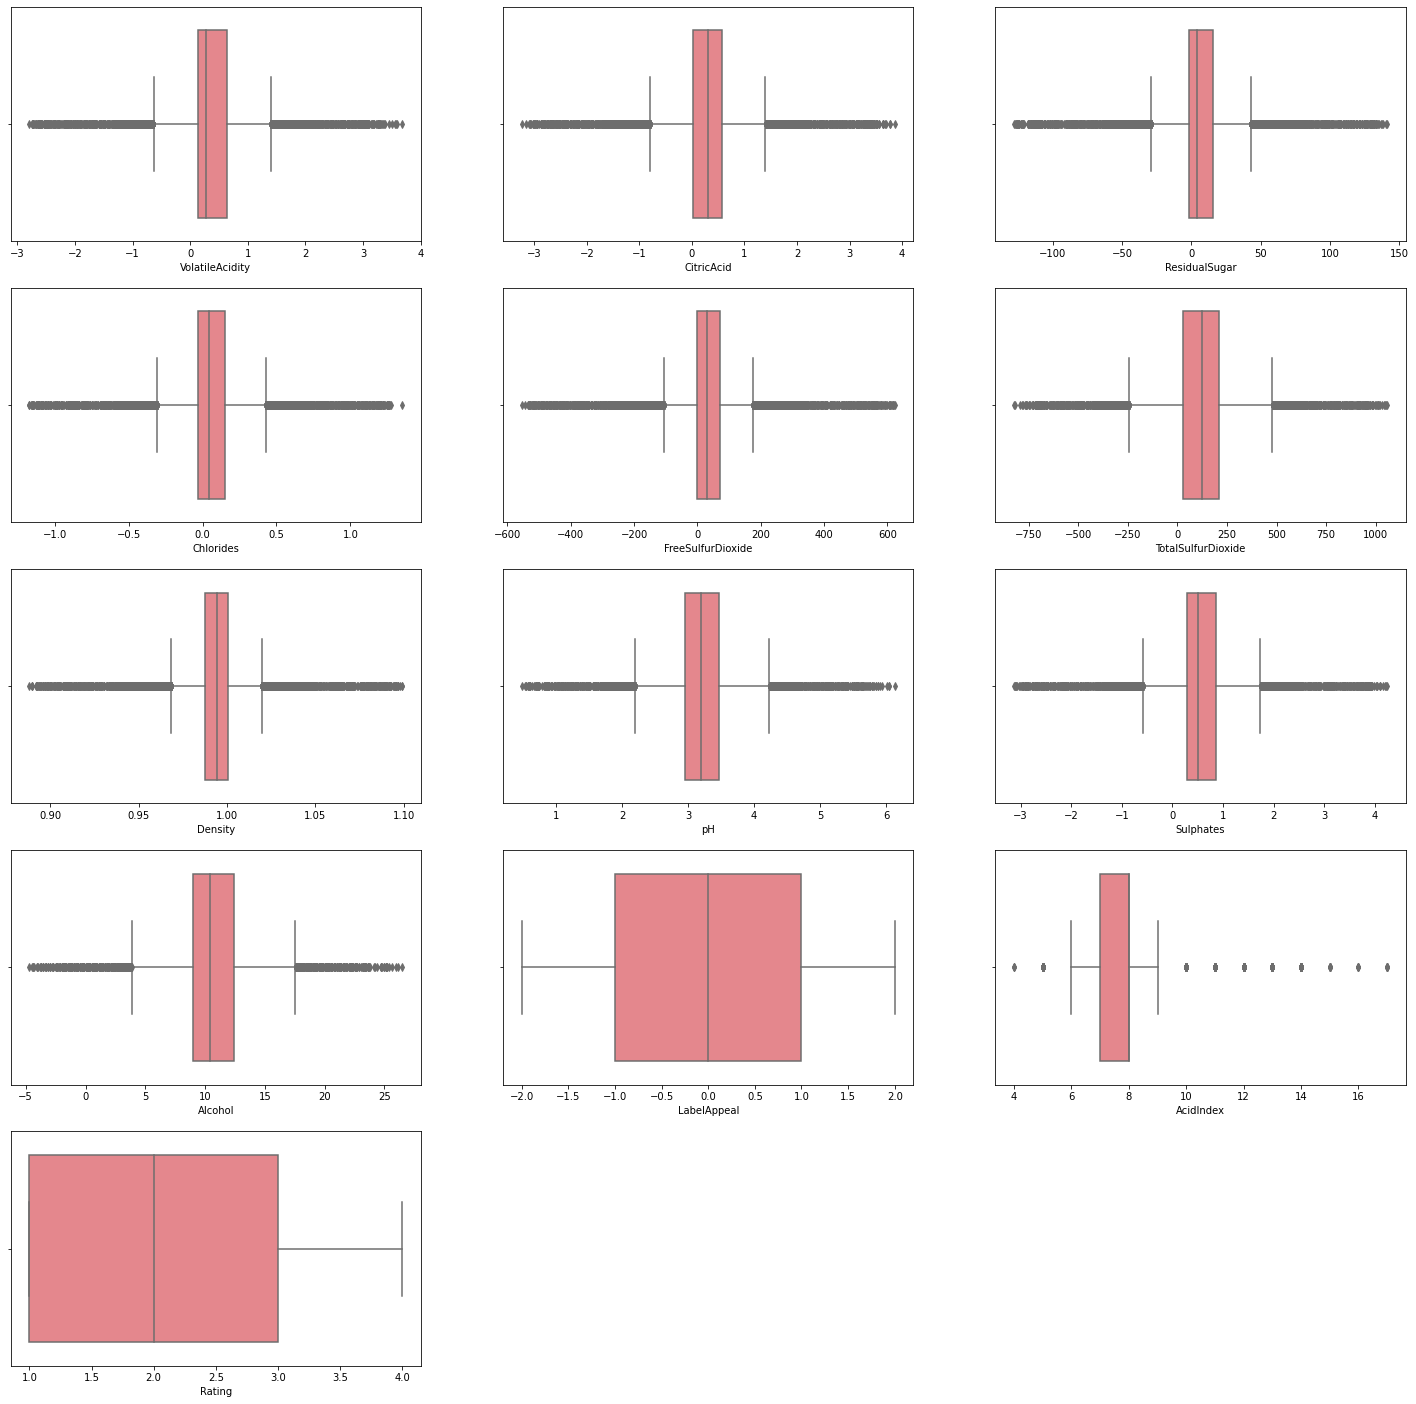

In [231]:
#code reference: https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/21953336#overview

#create boxplot and allocate size
df.boxplot(figsize=(25,25))

#counter
j = 1

#store each attribute in a python list to display boxplots side by side 
column = df.columns.tolist()

for i in column[2:]:
  plt.subplot(5,3,j)
  sns.boxplot(x=i,data=df, color="#f4777f")
  j += 1
plt.show()

All the attributes except rating have an extraordinary amount of outliers. This indicates that this raw data is unfit to be used for a machine learning model unless we do something about the outliers.

In [232]:
#show the statistics
df.describe()

,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


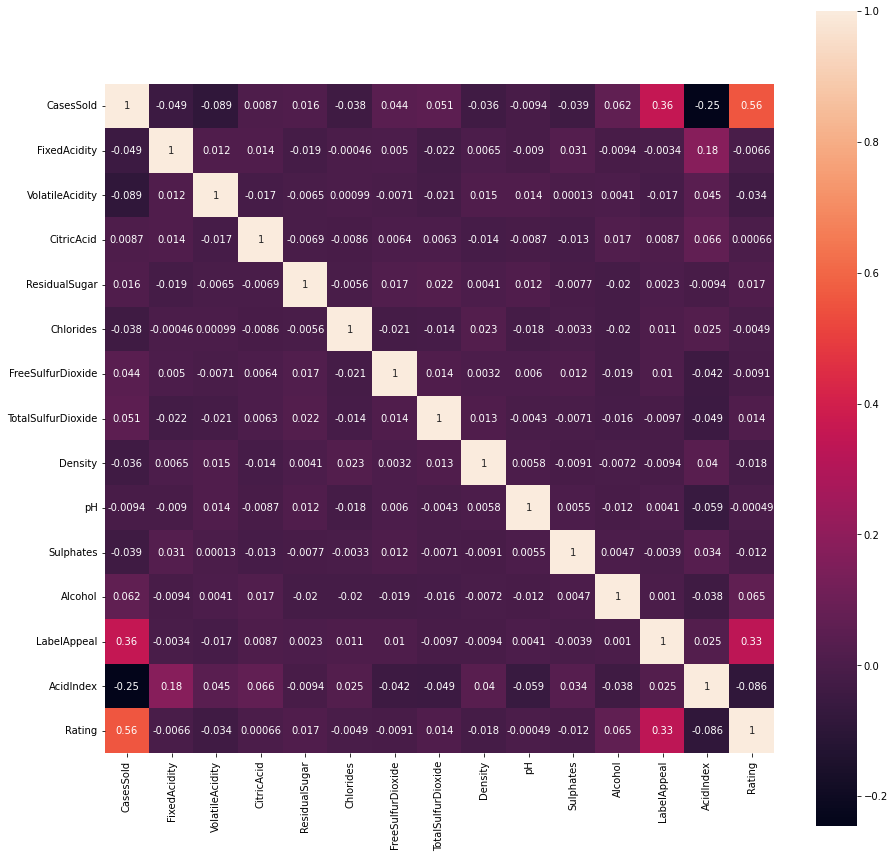

In [233]:
#correlation heatmap
corr = df.corr()
ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

**Insights**:
* Most of these attributes display very less correlation with each other.
* Rating and Label Appeal has a positive correlation with the number of cases sold which sounds reasonable.
* Acid Index negatively affects sales.

In summary, after our EDA it is clear that we need to clean the data and use various data preparation techniques like normalization, and feature scaling to fill in the missing values and find ways to correct the invalid data we found while checking for validity.

#**Data Preparation and Prepped Data Review**

Make Label Appeal more readable

In [234]:
#create new test dateframe
df_test = df
#increment all values in the column by 2
df_test['LabelAppeal'] = df['LabelAppeal'] +2

df_test.head()


,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,2,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,2,9,2.0


##**Fill in missing data using kNN impute**

In [235]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

df_filled = df_test

#price = df_test.to_numpy().reshape(-1,1)
knn = KNNImputer(n_neighbors=3)
imputed_price  = knn.fit_transform(df_filled)

#there should be an easier way to do this but this works too, for some reason I was getting an extra column in the new df so I had to drop it.
df_filled = imputed_price
df_filled = pd.DataFrame(df_filled)
df_filled.columns = column

#check if data is filled in
df_filled.head()


,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
0,3.0,3.2,1.160,-0.98,54.2,-0.567000,-27.666667,268.0,0.99280,3.33,-0.59,9.900000,2.0,8.0,2.0
1,3.0,4.5,0.160,-0.81,26.1,-0.425000,15.000000,-327.0,1.02792,3.38,0.70,13.216667,1.0,7.0,3.0
2,5.0,7.1,2.640,-0.88,14.8,0.037000,214.000000,142.0,0.99518,3.12,0.48,22.000000,1.0,8.0,3.0
3,3.0,5.7,0.385,0.04,18.8,-0.425000,22.000000,115.0,0.99640,2.24,1.83,6.200000,1.0,6.0,1.0
4,4.0,8.0,0.330,-1.26,9.4,0.022333,-167.000000,108.0,0.99457,3.12,1.77,13.700000,2.0,9.0,2.0


In [236]:
df_test.describe()

,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,1.990934,7.772724,2.041755
std,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,0.000000,4.000000,1.000000
25%,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,1.000000,7.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,2.000000,8.000000,2.000000
75%,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,3.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,4.000000,17.000000,4.000000


There is a marginal change to the mean and std of the affected attributes. Otherwise, it looks like kNN imputer kept the initial statistics of the dataframe mostly intact.

##**Integrity Transform and test**

In [237]:
print("Number of rows wine bottles: ",df_filled['TotalSulfurDioxide'].shape[0])

#only allow bottles with no more than 350ppm total sulfur dioxide
df_integrity = df_filled[df.TotalSulfurDioxide <= 350]

print("Number of wine bottle after: ",df_integrity.shape[0])


Number of rows wine bottles:  12795
Number of wine bottle after:  10369


We lost around 2400 rows which is not great but we shall test some analysis to see if there is any change compared to our initial EDA.

In [238]:
df_integrity.describe()

,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
count,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.00000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000
mean,3.009162,7.095742,0.330804,0.312128,4.994001,0.058544,31.181969,56.33658,0.994018,3.207143,0.507854,10.556397,1.996528,7.782428,2.018967
std,1.943902,6.361047,0.788851,0.860571,33.262153,0.314590,145.164909,175.83328,0.026569,0.677001,0.902462,3.639689,0.890183,1.341021,0.812236
min,0.000000,-18.000000,-2.790000,-3.240000,-127.100000,-1.171000,-555.000000,-823.00000,0.888090,0.480000,-3.130000,-4.400000,0.000000,4.000000,1.000000
25%,2.000000,5.100000,0.130000,0.030000,-3.800000,-0.024667,-1.000000,10.00000,0.987680,2.960000,0.160000,9.000000,1.000000,7.000000,1.333333
50%,3.000000,6.900000,0.290000,0.310000,3.500000,0.047000,30.000000,106.00000,0.994400,3.200000,0.490000,10.400000,2.000000,8.000000,2.000000
75%,4.000000,9.500000,0.650000,0.590000,15.400000,0.168000,73.000000,160.00000,1.000300,3.470000,0.820000,12.400000,3.000000,8.000000,2.666667
max,8.000000,34.400000,3.590000,3.860000,140.650000,1.351000,622.000000,350.00000,1.099240,6.130000,4.210000,26.100000,4.000000,17.000000,4.000000


The mean for residual sugar has decreased by about .6 points. Other than that the most affected variable seems to be TotalSulfurDioxide which is a good sign.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b9d243d10>,
      dtype=object)

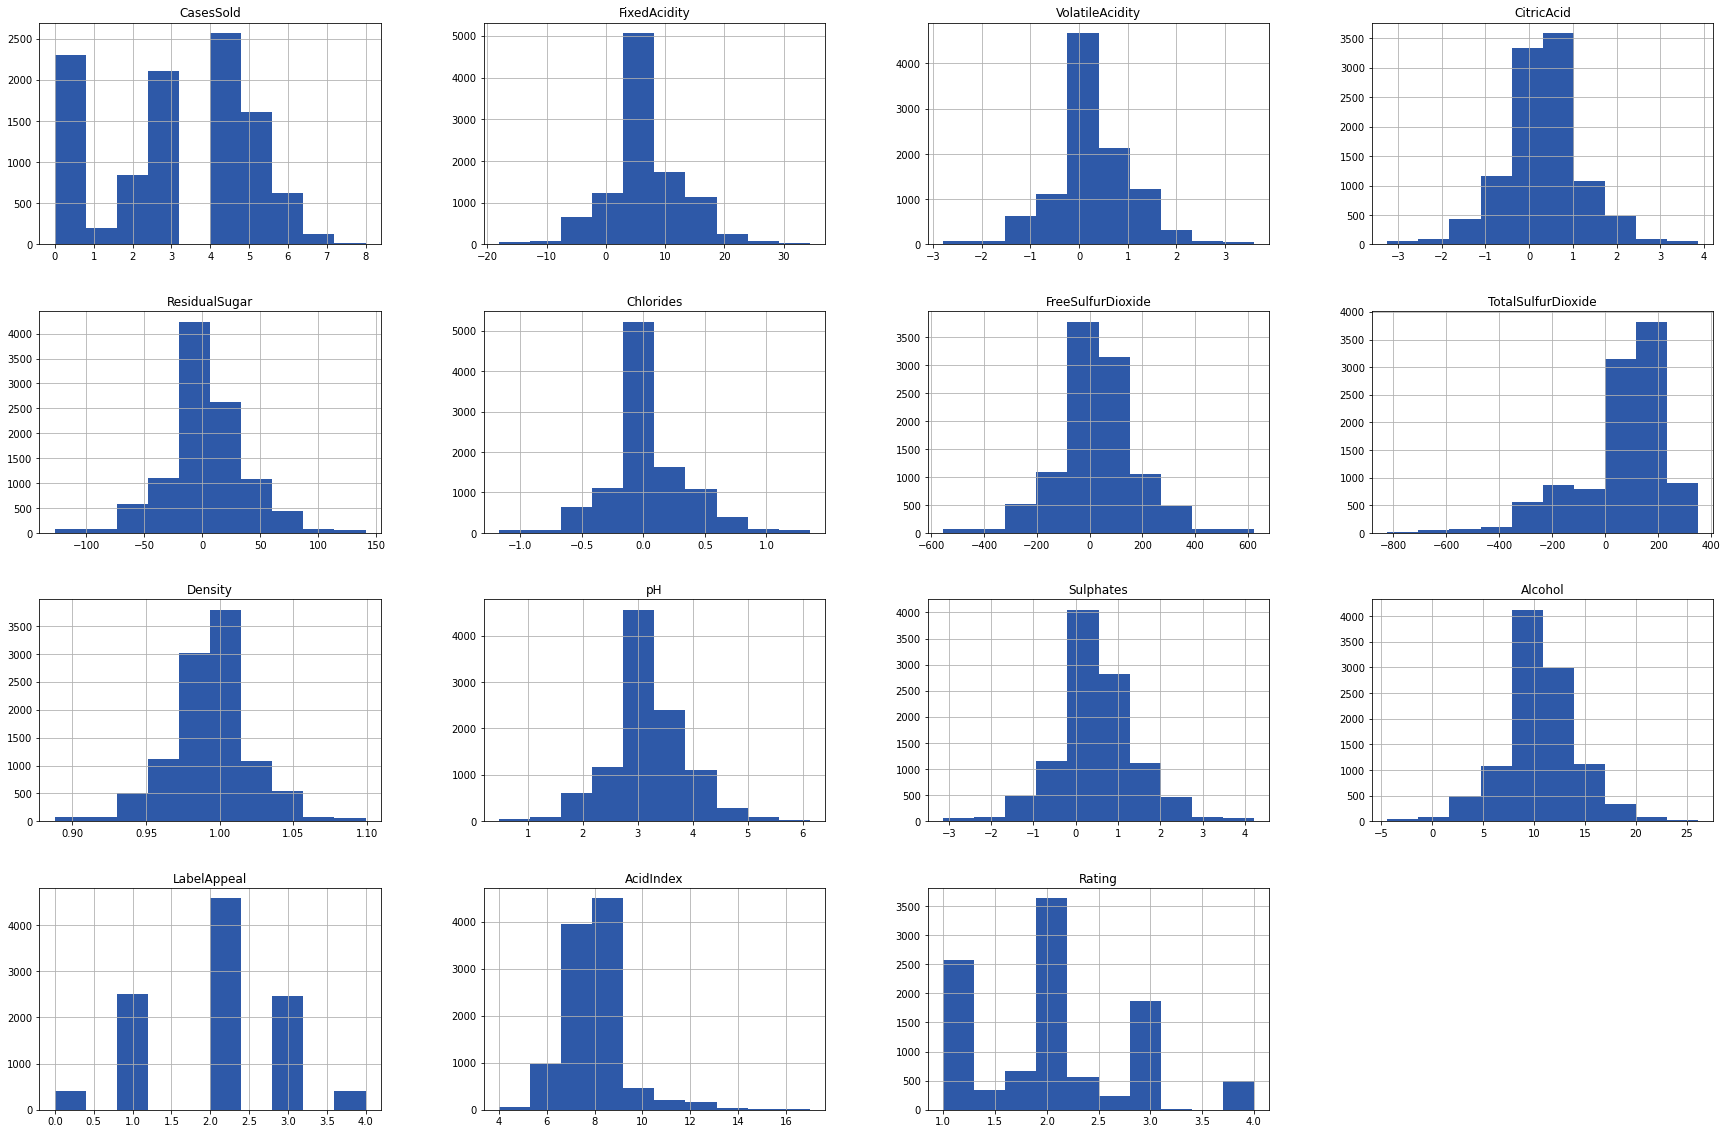

In [239]:
df_integrity.hist(figsize=(30,20), color='#2e59a8')

Most of the histograms have a normal distribution. However Total Sulphur Dioxide's distribution is now left skewed.

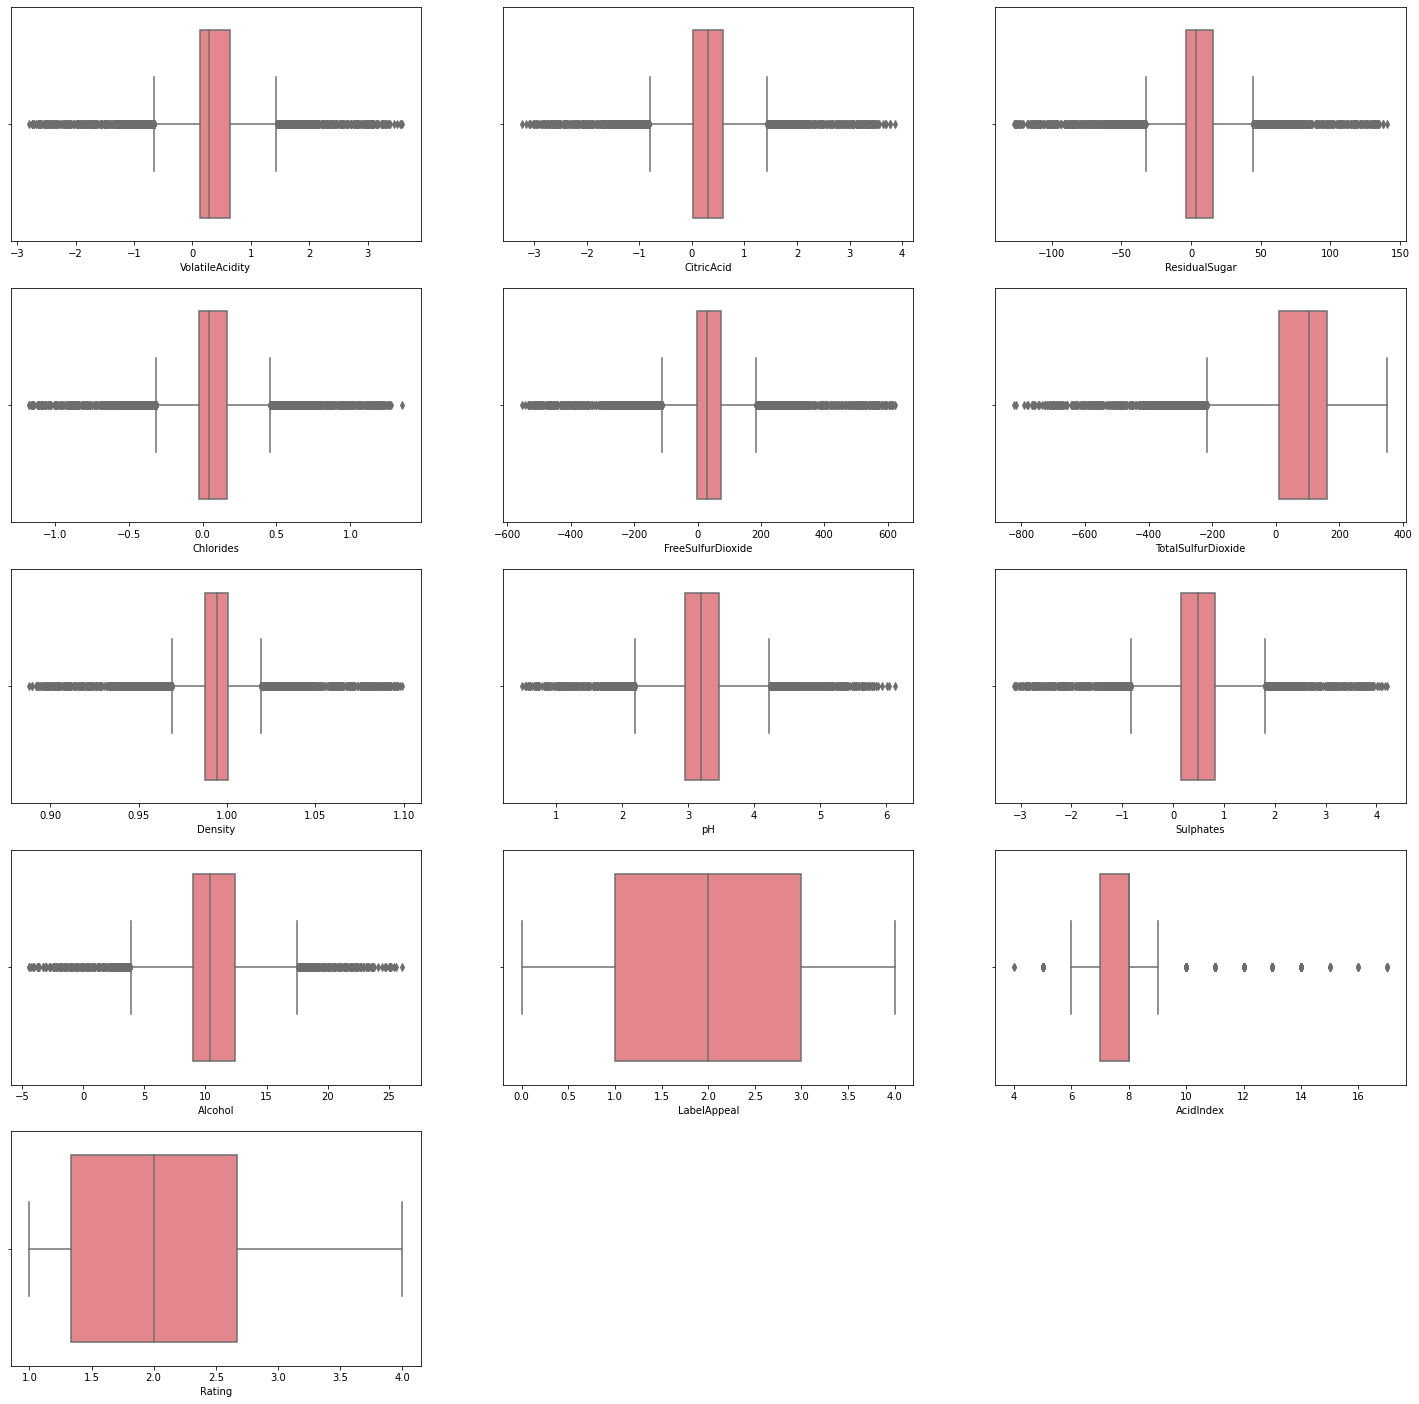

In [241]:
#code reference: https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/21953336#overview

#create boxplot and allocate size
df_integrity.boxplot(figsize=(25,25))

#counter
j = 1

#store each attribute in a python list to display boxplots side by side 
column = df_integrity.columns.tolist()

for i in column[2:]:
  plt.subplot(5,3,j)
  sns.boxplot(x=i,data=df_integrity, color="#f4777f")
  j += 1
plt.show()

The only major change is the shift in Total Sulphur Dioxide.

##**Nomalization**

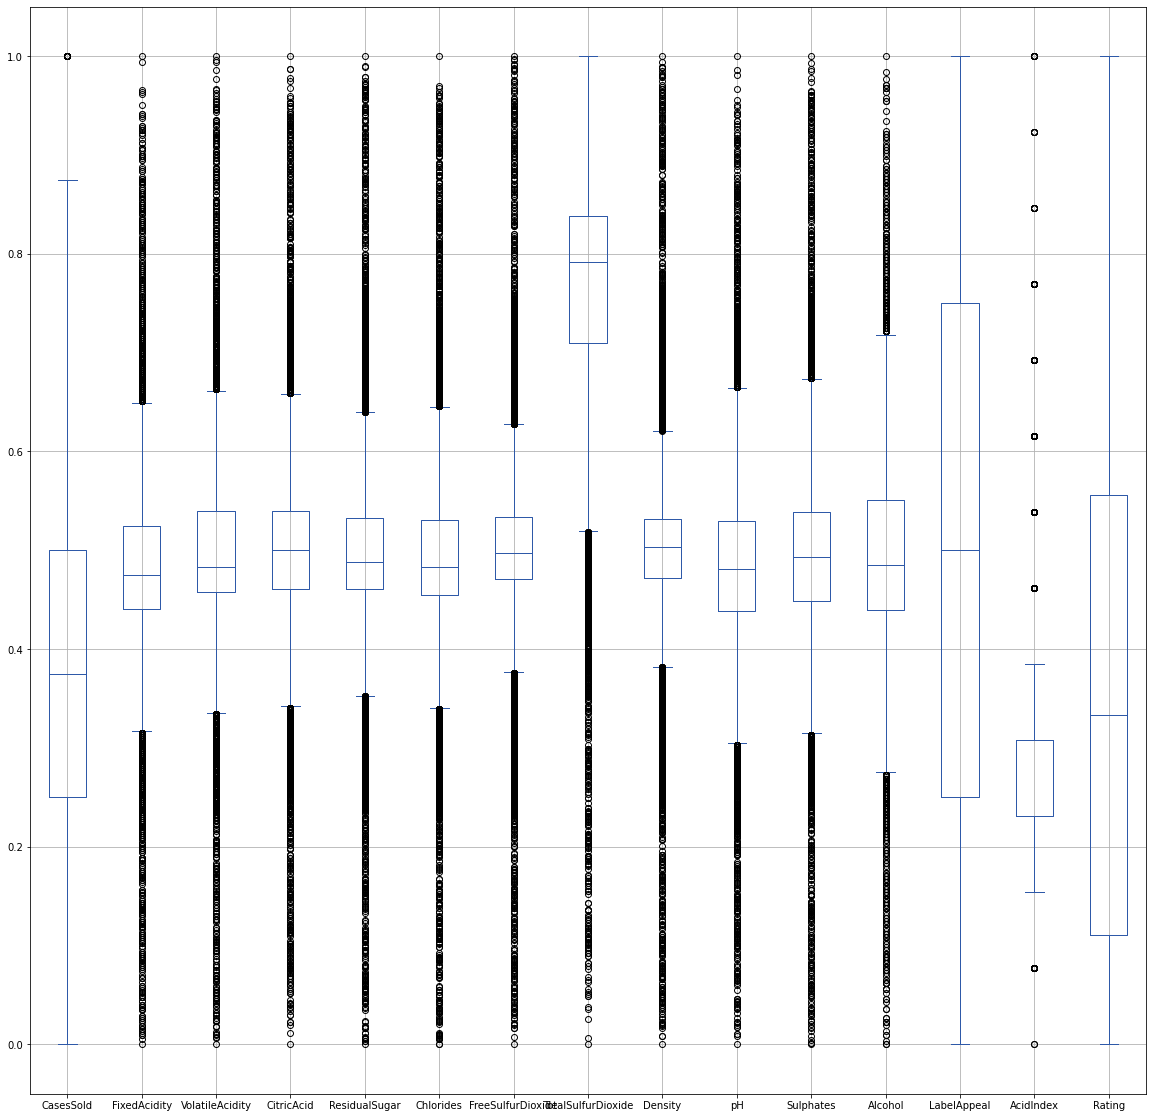

In [248]:
#see if there is any change to the boxplot
n_df = (df_integrity-df_integrity.min())/(df_integrity.max()-df_integrity.min())
n_df.boxplot(figsize=(20,20), color='#2e59a8')

The boxplots are extremely similar to the initial one granted here since the data is normalized we can compare their outliers and median side by side.

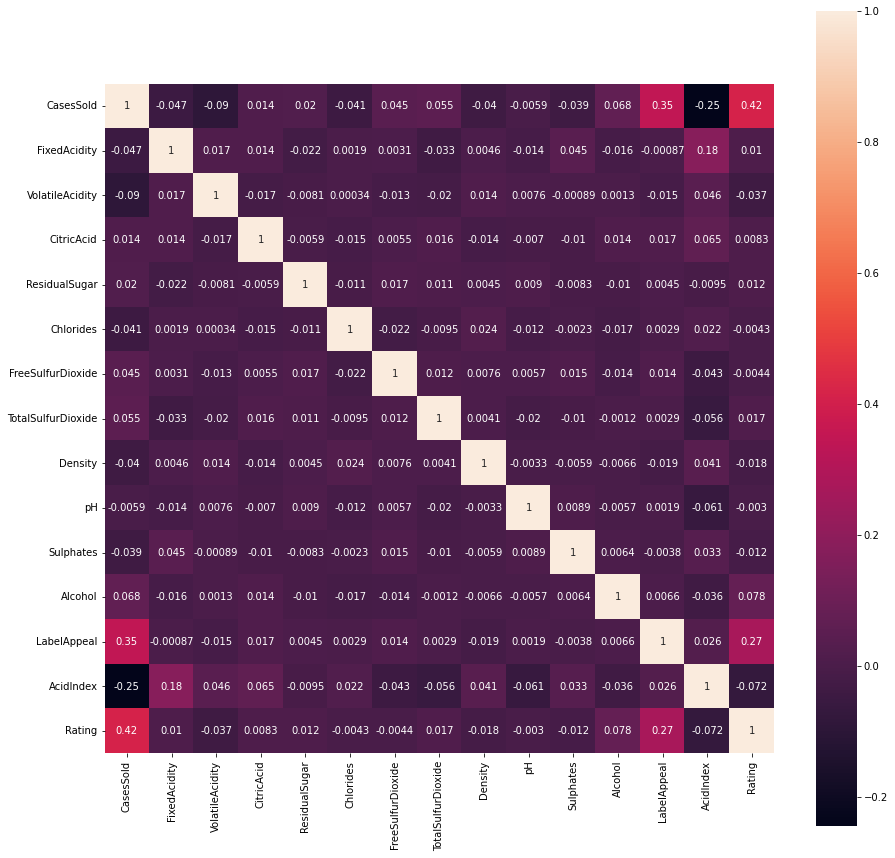

In [249]:
#correlation heatmap
corr = n_df.corr()
ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

There is a slight reduction in correlation between rating and cases sold.

In [250]:
n_df.describe()

,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
count,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000
mean,0.376145,0.478926,0.489154,0.500300,0.493348,0.487527,0.498031,0.749648,0.501673,0.482680,0.495620,0.490374,0.499132,0.290956,0.339656
std,0.242988,0.121394,0.123644,0.121207,0.124228,0.124738,0.123335,0.149900,0.125831,0.119823,0.122951,0.119334,0.222546,0.103155,0.270745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.440840,0.457680,0.460563,0.460504,0.454533,0.470688,0.710145,0.471655,0.438938,0.448229,0.439344,0.250000,0.230769,0.111111
50%,0.375000,0.475191,0.482759,0.500000,0.487768,0.482950,0.497026,0.791986,0.503481,0.481416,0.493188,0.485246,0.500000,0.307692,0.333333
75%,0.500000,0.524809,0.539185,0.539437,0.532213,0.530928,0.533560,0.838022,0.531423,0.529204,0.538147,0.550820,0.750000,0.307692,0.555556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#**Conclusion**

In summary, we do not think that our efforts in data cleaning and preparation made much of a difference as the given data has too many erroneous values which made it difficult to drop all those rows. If we did decide to drop the rows with negative values the dataset would have been reduced by more than half which would increase bias tremendously and make our model unfit for machine learning.